In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Market_Segmentation.csv')

In [4]:
data.head(10)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


**Satisfaction**: self-reported. rate the shopping experience at 1(not satisfied) to 10(extremely satisfied)

**Loyalty:** number of purchases for 1y + other factors. Continuous data (-2.5 to 2.5)

Text(0, 0.5, 'Loyalty')

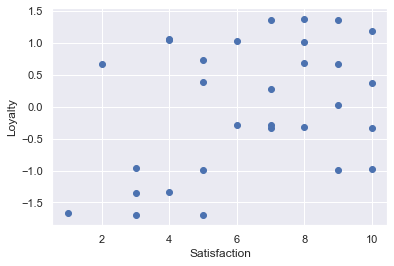

In [6]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Looks like there are two clusters

## Select the features

In [7]:
x = data.copy()

## Clustering

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [9]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x) # contain the predictions

Text(0, 0.5, 'Loyalty')

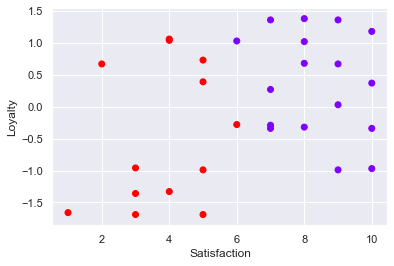

In [11]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=clusters['cluster_pred'],
           cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Probably the algorithm ONLY considered satisfaction as a feature

**WHY?:** Becasue we did not standardize the variable. 'Satisfaction' values are much higher then 'Loyalty'.

## Standardize the variables

In [14]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled # contains the standardized 'Satisfaction' and the same values for 'Loyalty'

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

**sklearn.preprocessing.scale(x):** standardizes with mean 0, and standard deviation of 1 by default each variable (column) separately

## the Elbow method

In [17]:
wcss = []
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.412861350999043,
 3.687975963852466]

Text(0, 0.5, 'WCSS')

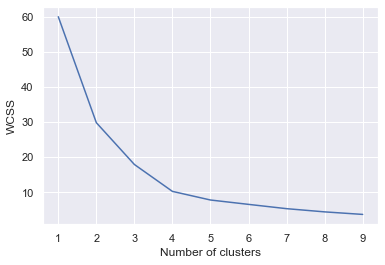

In [19]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Exolore clustering solutions and select the number of clusters

In [21]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head(10)

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

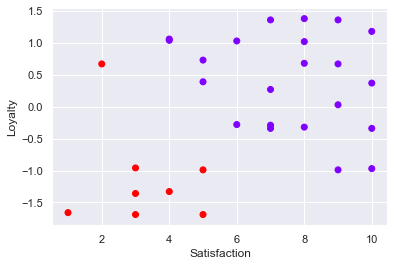

In [22]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],
            c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#### We often choose to plot using the original values for clearer interpretability.

## Try 3 clusters

In [23]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head(10)

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

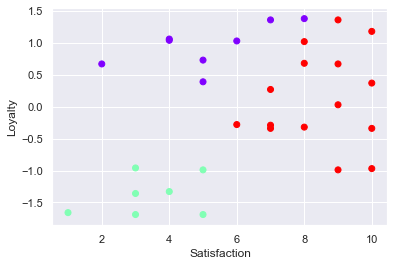

In [24]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],
            c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Green: **'Alienated'**,  Purple: **'Supporters'**,  Red: **'All that's left'**

## 4 clusters

In [25]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head(10)

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

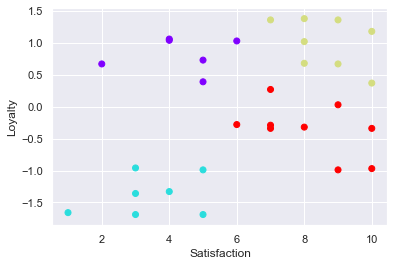

In [26]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],
            c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Blue: **Alienated**, Purple: **Supporters**, Yellow: **Fans**, Red: **Roamers**

## 5 clusters

In [27]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new.head(10)

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,4
2,5,-0.99,0
3,7,-0.29,4
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,4
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

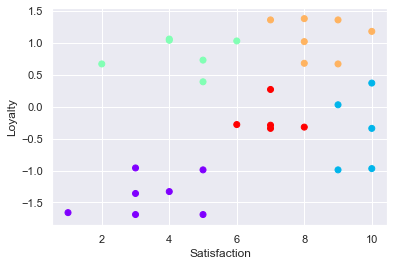

In [28]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],
            c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Purple: **Alienated**, Green: **Supporters**, Orange: **Fans**, Blue: **Roamers**, Red: **Roamers**

4 or 5 - cluster solution would be the best.